## Importing Libraries

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import matplotlib.pyplot as plt
from sklearn import cluster
from sklearn import preprocessing
import plotly.express as px
from sklearn.datasets import make_blobs
plt.style.use('dark_background')

## KMeans From Scratch

In [16]:
class KMeansClustering:
    def __init__(self, X, num_clusters):
        self.K = num_clusters # cluster number
        self.max_iterations = 1000 # max iteration. don't want to run inf time
        self.num_examples, self.num_features = X.shape # num of examples, num of features
        self.plot_figure = True # plot figure
        
    # randomly initialize centroids
    def initialize_random_centroids(self, X):
        centroids = np.zeros((self.K, self.num_features)) # row , column full with zero 
        for k in range(self.K): # iterations of 
            centroid = X[np.random.choice(range(self.num_examples))] # random centroids
            centroids[k] = centroid
        return centroids # return random centroids
    
    # create cluster Function
    def create_cluster(self, X, centroids):
        clusters = [[] for _ in range(self.K)]
        for point_idx, point in enumerate(X):
            closest_centroid = np.argmin(
                np.sqrt(np.sum((point-centroids)**2, axis=1))
            ) # closest centroid using euler distance equation(calculate distance of every point from centroid)
            clusters[closest_centroid].append(point_idx)
        return clusters 
    
    # new centroids
    def calculate_new_centroids(self, cluster, X):
        centroids = np.zeros((self.K, self.num_features)) # row , column full with zero
        for idx, cluster in enumerate(cluster):
            new_centroid = np.mean(X[cluster], axis=0) # find the value for new centroids
            centroids[idx] = new_centroid
        return centroids
    
    # prediction
    def predict_cluster(self, clusters, X):
        y_pred = np.zeros(self.num_examples) # row1 fillup with zero
        for cluster_idx, cluster in enumerate(clusters):
            for sample_idx in cluster:
                y_pred[sample_idx] = cluster_idx
        return y_pred
    
    # plotinng scatter plot
    def plot_fig(self, X, y):
        fig = px.scatter(X[:, 0], X[:, 1], color=y)
        fig.show() # visualize
        
    # fit data
    def fit(self, X):
        centroids = self.initialize_random_centroids(X) # initialize random centroids
        for _ in range(self.max_iterations):
            clusters = self.create_cluster(X, centroids) # create cluster
            previous_centroids = centroids
            centroids = self.calculate_new_centroids(clusters, X) # calculate new centroids
            diff = centroids - previous_centroids # calculate difference
            if not diff.any():
                break
        y_pred = self.predict_cluster(clusters, X) # predict function
        if self.plot_figure: # if true
            self.plot_fig(X, y_pred) # plot function 
        return y_pred
            
if __name__ == "__main__":
    np.random.seed(42)
    num_clusters = 3 # num of cluster
    X, _ = make_blobs(n_samples=1000, n_features=2, centers=num_clusters) # create dataset using make_blobs from sklearn datasets
    Kmeans = KMeansClustering(X, num_clusters)
    y_pred = Kmeans.fit(X)

## Read dataset

In [3]:
df = pd.read_csv("data/Wholesale customers data.csv")
df.head(20)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
5,2,3,9413,8259,5126,666,1795,1451
6,2,3,12126,3199,6975,480,3140,545
7,2,3,7579,4956,9426,1669,3321,2566
8,1,3,5963,3648,6192,425,1716,750
9,2,3,6006,11093,18881,1159,7425,2098


## preprocessing with standard scaler

In [4]:
scaler = preprocessing.StandardScaler()
data_scaled = scaler.fit_transform(df)

pd.DataFrame(data_scaled).describe()

,0,1,2,3,4,5,6,7
count,4.400000e+02,4.400000e+02,4.400000e+02,440.000000,4.400000e+02,4.400000e+02,4.400000e+02,4.400000e+02
mean,1.614870e-17,3.552714e-16,-3.431598e-17,0.000000,-4.037175e-17,3.633457e-17,2.422305e-17,-8.074349e-18
std,1.001138e+00,1.001138e+00,1.001138e+00,1.001138,1.001138e+00,1.001138e+00,1.001138e+00,1.001138e+00
min,-6.902971e-01,-1.995342e+00,-9.496831e-01,-0.778795,-8.373344e-01,-6.283430e-01,-6.044165e-01,-5.402644e-01
25%,-6.902971e-01,-7.023369e-01,-7.023339e-01,-0.578306,-6.108364e-01,-4.804306e-01,-5.511349e-01,-3.964005e-01
50%,-6.902971e-01,5.906683e-01,-2.767602e-01,-0.294258,-3.366684e-01,-3.188045e-01,-4.336004e-01,-1.985766e-01
75%,1.448652e+00,5.906683e-01,3.905226e-01,0.189092,2.849105e-01,9.946441e-02,2.184822e-01,1.048598e-01
max,1.448652e+00,5.906683e-01,7.927738e+00,9.183650,8.936528e+00,1.191900e+01,7.967672e+00,1.647845e+01


## Fit Data

In [17]:
kmeans2 = cluster.KMeans(n_clusters=2, init='random') # ‘k-means++’ : selects initial cluster centers for k-mean clustering in a smart way to speed up convergence.
kmeans2.fit(data_scaled)

/home/thomas/miniconda3/envs/kmeans/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



KMeans(init='random', n_clusters=2)

In [18]:
kmeans.inertia_


1551.6677076665612

## elbow method

/home/thomas/miniconda3/envs/kmeans/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/home/thomas/miniconda3/envs/kmeans/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/home/thomas/miniconda3/envs/kmeans/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/home/thomas/miniconda3/envs/kmeans/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/home/thomas/miniconda3/envs/kme

Text(0, 0.5, 'Inertia')

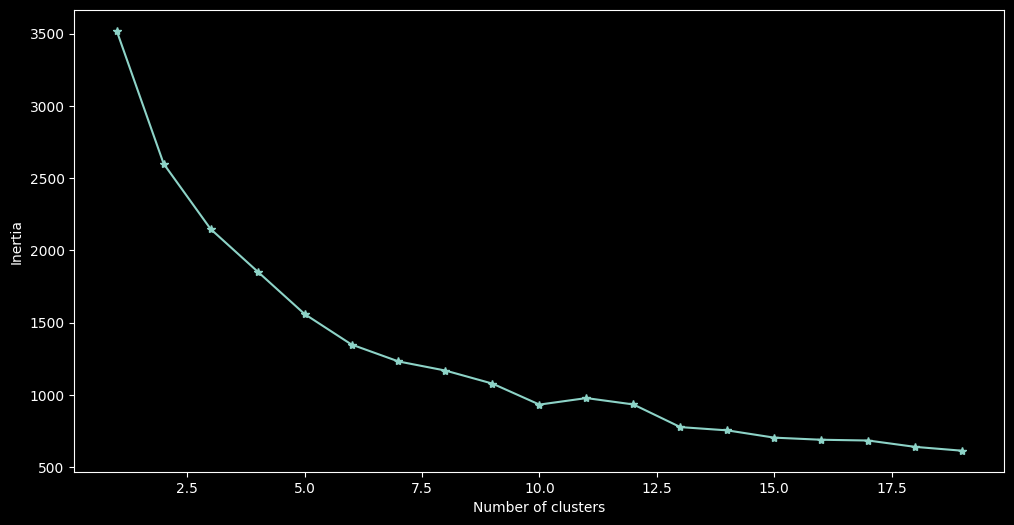

In [20]:
SSE = []
for i in range(1,20):
    kmeans = cluster.KMeans(n_clusters = i, init='random') # iterate from range (1, 20)
    kmeans.fit(data_scaled)
    SSE.append(kmeans.inertia_)

# converting the results into a dataframe and plotting them
frame = pd.DataFrame({'Cluster':range(1,20), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker="*")
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

### Cluster5

In [25]:
kmeans5 = cluster.KMeans(n_clusters=5, init='random')
kmeans5.fit(data_scaled)
pred = kmeans5.predict(data_scaled)
pred

/home/thomas/miniconda3/envs/kmeans/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



array([3, 3, 3, 0, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 0, 3, 0, 3, 0, 3, 0,
       0, 1, 3, 3, 0, 0, 3, 0, 0, 0, 0, 0, 0, 3, 0, 3, 3, 0, 0, 0, 3, 3,
       3, 3, 3, 2, 3, 3, 0, 0, 3, 3, 0, 0, 2, 3, 0, 0, 3, 2, 3, 3, 0, 2,
       0, 3, 0, 0, 0, 1, 0, 3, 3, 0, 0, 3, 0, 0, 0, 3, 3, 0, 3, 2, 2, 1,
       0, 0, 0, 0, 2, 0, 3, 0, 3, 0, 0, 0, 3, 3, 3, 0, 0, 0, 3, 3, 3, 3,
       0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 3, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 3, 3, 0, 3, 3, 3, 0, 0, 3, 3, 3, 3, 0, 0, 0, 3, 3, 0, 3, 0, 3,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 3, 3, 0, 0, 0, 3, 0, 0, 4, 3,
       4, 4, 3, 3, 4, 4, 4, 3, 4, 4, 4, 3, 4, 2, 4, 4, 3, 4, 3, 4, 3, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 3, 4, 4, 4, 4, 4, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       3, 4, 3, 4, 3, 4, 4, 4, 4, 0, 0, 0, 0, 0, 0, 3, 0, 3, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 3, 4, 3, 4, 3, 3, 4, 3,

In [26]:
frame = pd.DataFrame(data_scaled)
frame['cluster'] = pred
frame['cluster'].value_counts()

cluster
0    207
3    126
4     91
2     10
1      6
Name: count, dtype: int64

In [27]:
dataset = df.copy()
dataset["cluster"] = pred

In [28]:
fig = px.scatter_3d(dataset, x="Grocery", y="Milk", z="Fresh", color='cluster', size="Fresh", size_max=30)
fig.show()

### Cluster6

In [29]:
kmeans6 = cluster.KMeans(n_clusters=6, init='random')
kmeans6.fit(data_scaled)
pred = kmeans6.predict(data_scaled)
pred

/home/thomas/miniconda3/envs/kmeans/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



array([4, 4, 4, 5, 4, 4, 4, 4, 5, 4, 4, 4, 4, 4, 4, 5, 4, 5, 4, 5, 4, 5,
       3, 0, 4, 4, 5, 5, 4, 3, 5, 5, 5, 3, 5, 4, 3, 4, 4, 3, 3, 5, 4, 4,
       4, 4, 4, 0, 4, 4, 5, 5, 3, 4, 3, 5, 0, 4, 5, 5, 4, 0, 4, 4, 5, 0,
       5, 4, 5, 5, 3, 3, 5, 4, 4, 5, 5, 4, 5, 5, 5, 4, 4, 5, 4, 0, 0, 3,
       5, 3, 5, 5, 0, 3, 4, 5, 4, 5, 5, 5, 4, 4, 4, 3, 5, 5, 4, 4, 4, 4,
       5, 4, 3, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 3, 3, 3, 4, 5, 3, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 3, 3, 5, 5, 4, 5, 5, 5, 3, 5, 5, 5, 5,
       5, 4, 4, 5, 4, 4, 4, 5, 5, 4, 4, 4, 4, 5, 5, 5, 4, 4, 5, 4, 5, 4,
       3, 5, 5, 5, 5, 2, 5, 2, 5, 5, 5, 5, 4, 4, 5, 5, 5, 4, 5, 3, 3, 4,
       1, 1, 4, 4, 1, 1, 1, 4, 1, 1, 1, 4, 1, 0, 1, 1, 4, 1, 4, 1, 4, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1,
       1, 1, 1, 4, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 3, 3, 1, 1, 1, 1,
       4, 1, 4, 1, 4, 1, 1, 1, 1, 3, 5, 5, 3, 3, 5, 4, 5, 4, 3, 3, 3, 3,
       5, 5, 5, 3, 5, 5, 5, 4, 5, 4, 5, 4, 4, 5, 4,

In [30]:
frame = pd.DataFrame(data_scaled)
frame['cluster'] = pred
frame['cluster'].value_counts()

cluster
5    188
4    124
1     59
3     55
0     11
2      3
Name: count, dtype: int64

In [31]:
dataset = df.copy()
dataset["cluster"] = pred

In [32]:
fig = px.scatter_3d(dataset, x="Grocery", y="Milk", z="Fresh", color='cluster', size="Fresh", size_max=30)
fig.show()

### Cluster7

In [33]:
kmeans7 = cluster.KMeans(n_clusters=7, init='random')
kmeans7.fit(data_scaled)
pred = kmeans7.predict(data_scaled)
pred

/home/thomas/miniconda3/envs/kmeans/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



array([5, 5, 5, 0, 5, 5, 5, 5, 0, 5, 5, 5, 5, 5, 5, 0, 5, 0, 5, 0, 5, 0,
       3, 4, 5, 5, 0, 0, 5, 3, 0, 0, 0, 3, 0, 5, 3, 5, 5, 3, 6, 0, 5, 5,
       5, 5, 5, 4, 5, 5, 0, 0, 3, 5, 0, 0, 4, 5, 0, 0, 5, 4, 5, 5, 0, 4,
       0, 5, 0, 0, 6, 6, 6, 5, 5, 0, 0, 5, 0, 0, 0, 5, 5, 0, 5, 4, 4, 3,
       6, 0, 0, 6, 4, 6, 5, 0, 5, 0, 0, 0, 5, 5, 5, 3, 0, 0, 5, 5, 5, 5,
       0, 5, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 3, 3, 6, 5, 0, 3, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 6, 0, 5, 0, 0, 0, 3, 0, 0, 0, 0,
       0, 5, 5, 0, 5, 5, 5, 0, 0, 5, 5, 5, 5, 0, 0, 0, 5, 5, 0, 5, 0, 5,
       3, 0, 0, 0, 0, 3, 0, 1, 0, 0, 0, 0, 5, 5, 6, 0, 0, 5, 0, 6, 6, 5,
       2, 2, 5, 5, 2, 2, 2, 5, 2, 2, 2, 5, 2, 4, 2, 2, 5, 2, 5, 2, 5, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2,
       2, 2, 2, 5, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 3, 3, 2, 2, 2, 2,
       5, 2, 5, 2, 5, 2, 2, 2, 2, 3, 0, 0, 3, 6, 0, 5, 0, 5, 3, 6, 3, 3,
       0, 6, 0, 3, 0, 0, 0, 5, 2, 5, 2, 5, 5, 2, 5,

In [34]:
frame = pd.DataFrame(data_scaled)
frame['cluster'] = pred
frame['cluster'].value_counts()

cluster
0    157
5    124
2     80
6     35
3     31
4     11
1      2
Name: count, dtype: int64

In [35]:
dataset = df.copy()
dataset["cluster"] = pred

In [36]:
fig = px.scatter_3d(dataset, x="Grocery", y="Milk", z="Fresh", color='cluster', size="Fresh", size_max=30)
fig.show()

### Cluster8